In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['googleplaystore.csv', 'license.txt', 'googleplaystore_user_reviews.csv']


In [2]:
#lets read our data
df=pd.read_csv('../input/googleplaystore.csv')

In [3]:
#head of data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Reviews:**

1.Description

2.Transformation

In [7]:
'''Description'''
df['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [8]:
#get the position of the M value
df[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Position of **10472** . 
now remove it

In [9]:
#drop series containing M
df.drop(df.index[10472],inplace=True)

In [10]:
#convert column into integer values
df['Reviews']=df['Reviews'].astype(int)

In [11]:
#check for conversion again
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Befor Continuing , Lets make a function that makes our analysis instead of repeating codes:
Illustrating  absolute frequency and plotting using barplot

In [12]:
def univariateAnalysis(featureName):
    mDB=pd.DataFrame({'Absolute_Frequency':featureName.value_counts()})    
    #get index of data as x axis and convert to an array
    x=mDB.index.values
    #get y and convert to an array
    y=mDB.Absolute_Frequency.values
    #scaling
    plt.figure(figsize=(8,8))
    #colors = sns.color_palette("CMRmap", len(db))
    #plotting
    BarplotDB=sns.barplot(x,y,palette="CMRmap")
    #get ticks and make it 90 degree to be visible clearly
    BarplotDB.set_xticklabels(BarplotDB.get_xticklabels(), rotation=90)


In [13]:
df.Type.value_counts()


Free    10039
Paid      800
Name: Type, dtype: int64

In [14]:
df.Type.isna().sum()

1

In [15]:
'''Transformation'''
df['Type'].fillna('Free',inplace=True)


In [16]:
df.Type.isna().sum()

0

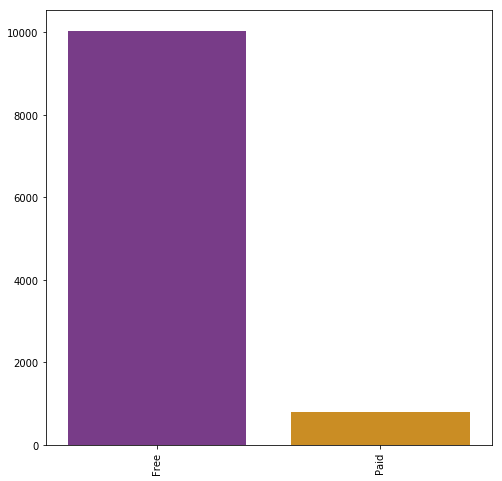

In [17]:
'''Analysis'''
univariateAnalysis(df.Type)


**Size:**
 1. Description

 2.Transformation



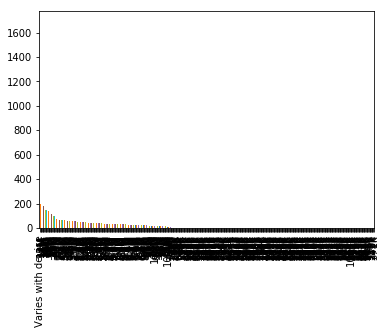

In [18]:
'''Description'''
df.Size.value_counts().plot(kind='bar')

In [19]:
'''Transformation'''
#remove M  from values of size 
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
#extract numeric values from size column and put it in new series
newSize=df[df[['Size']].apply(lambda x: x[0].isdigit(), axis=1)]
'''here some rows were removed but we will fix it latter dont worry'''
#make new dataframe
newSizeData=newSize.Size
#convert numeric values into floats 
newSizeData=newSizeData.astype(float)
'''removing fractions will not affect size at all'''

'removing fractions will not affect size at all'

In [20]:
#mean
newSizeData.mean()

34.26431718061674

In [21]:
#median
newSizeData.median()

26.0

In [22]:
#mode
newSizeData.mode()

0    11.0
dtype: float64

In [23]:
df.Size.str.contains("k").value_counts()
#replace all values containg K by .5
df.loc[df['Size'].str.contains('k'), 'Size'] = '.5M'
'''NOW WE WILL MAKE A THIng replace varies with 0 and get'''
df.loc[df['Size'].str.contains('Varies with device'), 'Size'] = '31M'
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))

In [24]:
df.Size.value_counts()

31      1765
.5       316
11       198
12       196
14       194
13       191
15       184
17       160
19       154
26       149
16       149
25       143
20       139
21       138
10       136
24       136
18       133
23       117
22       114
29       103
27        97
28        95
30        84
33        79
3.3       77
37        76
35        72
2.9       69
2.3       68
2.5       68
        ... 
72        19
95        18
68        18
94        17
85        17
98        16
93        16
100       16
66        16
9.6       15
73        15
9.3       15
83        15
64        15
92        15
71        14
88        14
87        13
80        13
75        13
77        13
81        11
79        11
10.0      10
65        10
84         9
89         9
86         8
1.0        7
90         6
Name: Size, Length: 183, dtype: int64

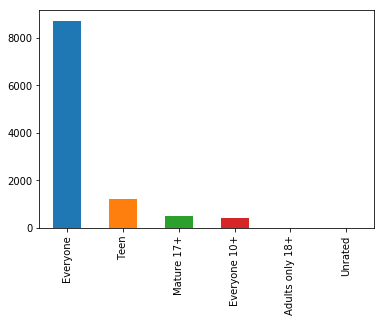

In [25]:
#count categories values                  
df['Content Rating'].value_counts().plot(kind='bar')

In [26]:
df['Content Rating'].isna().sum()

0

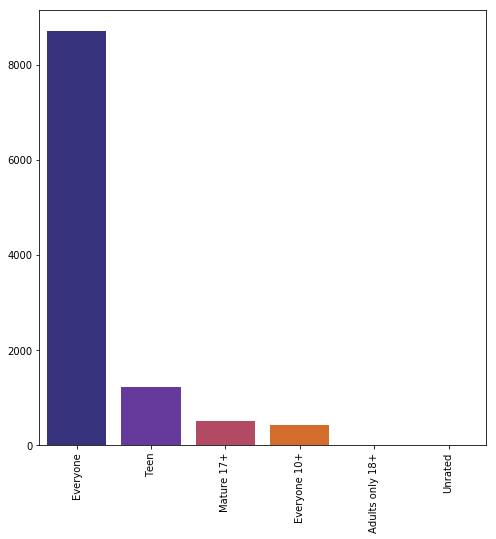

In [27]:
univariateAnalysis( df['Content Rating'])

**Current version**
1.Description.
2.Transformation.
3.Analysis.

In [28]:
'''Description'''
df['Current Ver'].value_counts()


Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
1.2.0                   43
1.8                     42
4.0                     40
1.9                     37
2.3.2                   35
1.0.7                   34
2.4                     34
                      ... 
5.28.0                   1
1.2.2.0                  1
10.5.00                  1
3.3.8.03082017           1
1.36                     1
1.7.28                   1
1

In [29]:
'''Transformation'''
df['Current Ver']=df['Current Ver'].fillna(value=4.1)


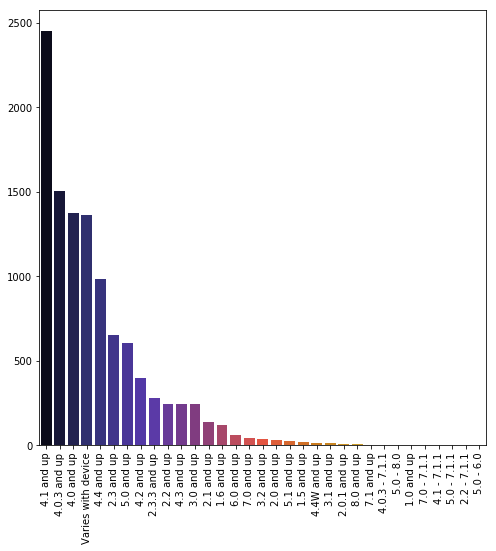

In [30]:
'''Analysis'''
univariateAnalysis( df['Android Ver'])


In [31]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [32]:
df['Installs'].isnull().sum()

0

In [33]:
'''Transformation'''
#remove + from installs
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
#remove commas from installs
df['Installs']  = df['Installs'] .str.replace(',', '')
df['Installs'] =df['Installs'] .astype(int)
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

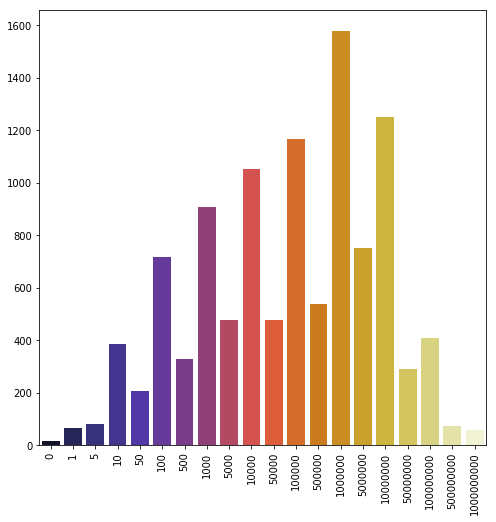

In [34]:
'''Analysis'''
univariateAnalysis(df['Installs'])


**what we have here??**
ups and downs ! . For all apps I think that is because users often don't update their mobile versions so  when a new version or update of the app releases, when they open their app again ,crashes occurs. This leades to unInstalling applications .****

**Rating :**

1 . Description


2 . Analysis

In [35]:
'''Description'''
df['Rating'].value_counts() 


4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [36]:
df['Rating'].isna().sum()

1474

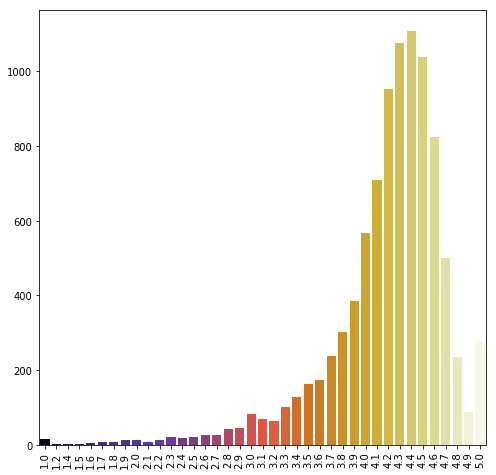

In [37]:
'''Analysis'''
univariateAnalysis(df['Rating'])

**Bivariate Analysis**

In [38]:

def barplotAnalysis(x,y):
    
    plt.figure(figsize=(10,8))
    plt.xticks(rotation=90)
    #plotting
    sns.barplot(x,y,palette="CMRmap")


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


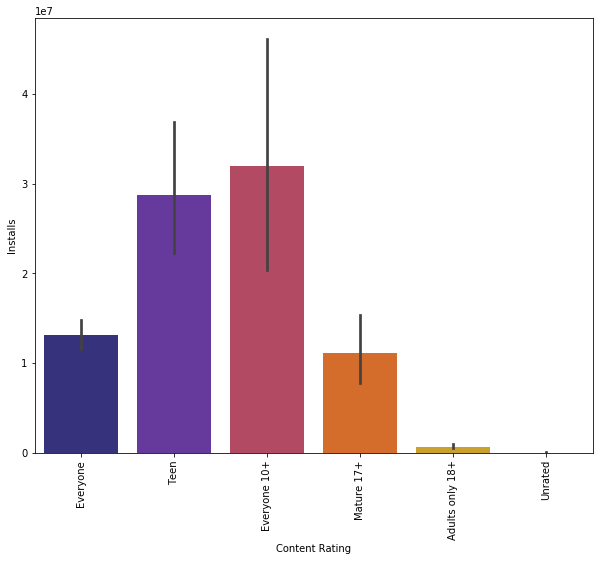

In [39]:
barplotAnalysis(df['Content Rating'],df['Installs'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


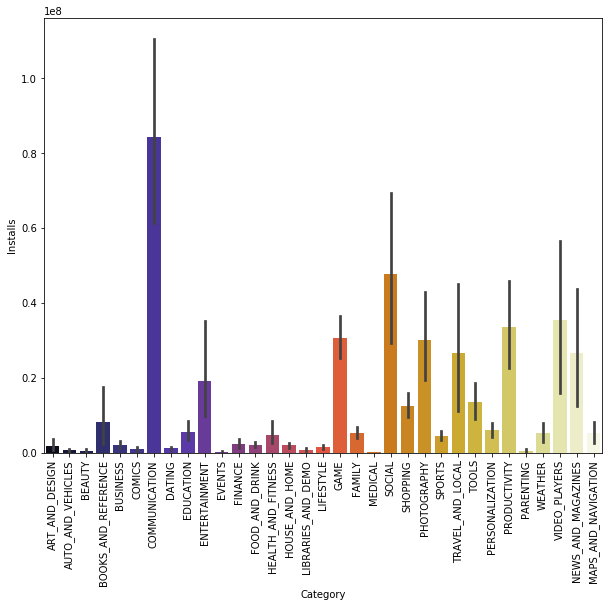

In [40]:
barplotAnalysis(df['Category'],df['Installs'])

communications- social apps have higher rates of installs 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


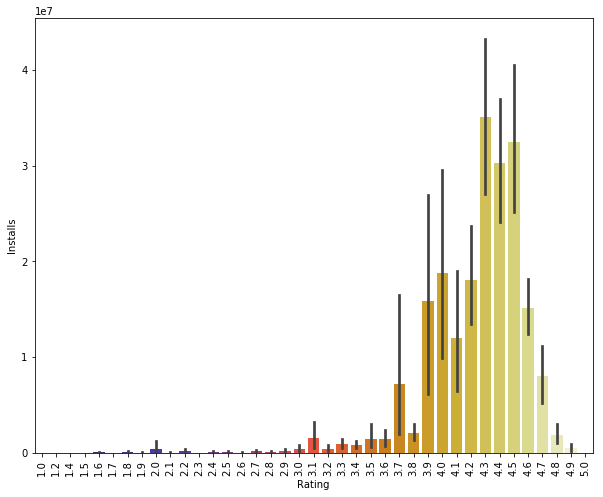

In [41]:
barplotAnalysis(df['Rating'],df['Installs'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


App                 object
Category            object
Rating             float64
Reviews              int64
Size              category
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

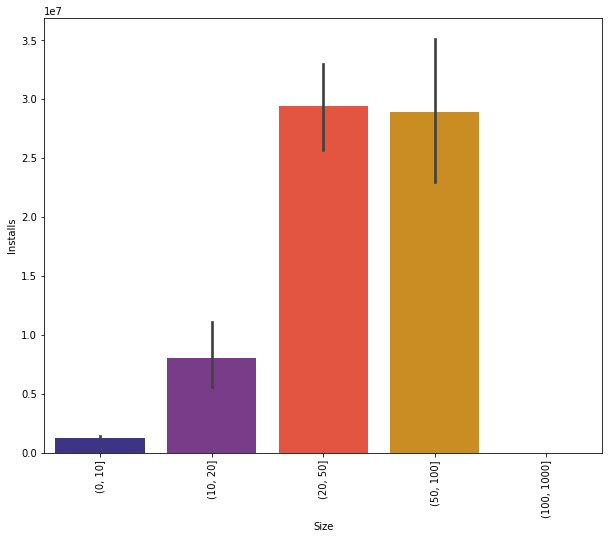

In [42]:

#convert to float
#bins
x = [0, 10,20,50,100,1000]
df['Size']=df['Size'].astype(float)

df['Size'] = pd.cut(df['Size'],x)
df.dtypes
#coding bins groups
#db.Size.astype("category").cat.codes
barplotAnalysis(df['Size'],df['Installs'])
df.dtypes


In [43]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"(10, 20]",10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"(10, 20]",500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


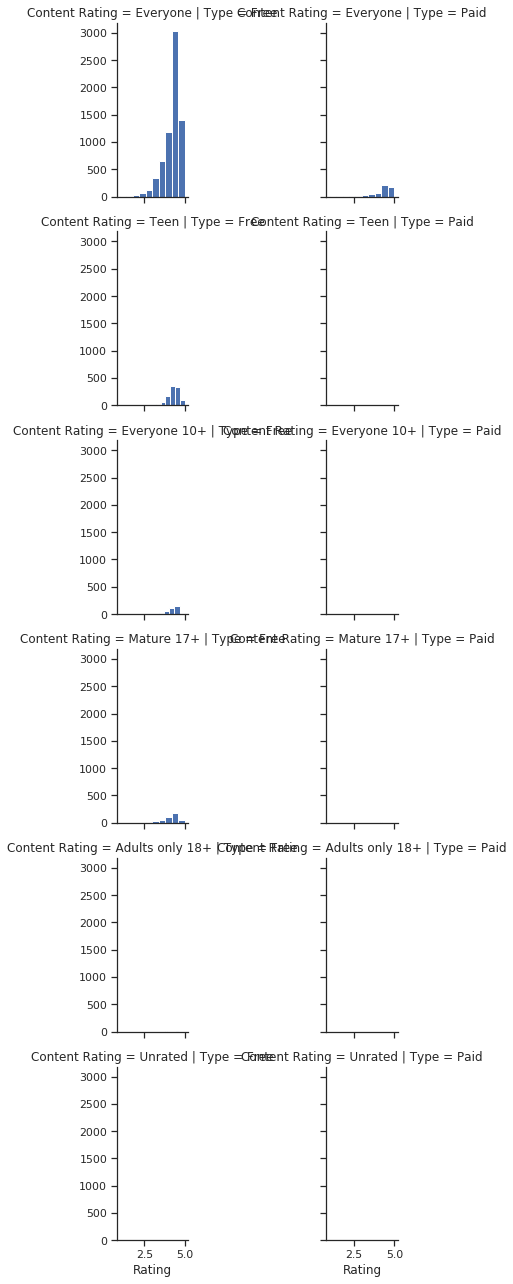

In [44]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(df, col="Type", row="Content Rating")
g = g.map(plt.hist, "Rating")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


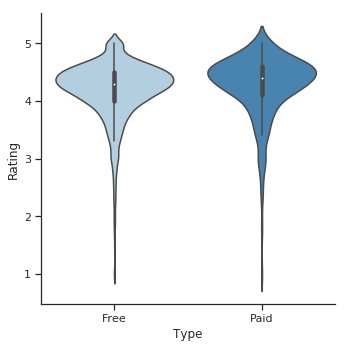

In [45]:
#catplot 
sns.catplot(x='Type', y='Rating', kind='violin',palette = 'Blues',  data=df)

In [46]:
df.Genres.value_counts().head(2)

Tools            842
Entertainment    623
Name: Genres, dtype: int64

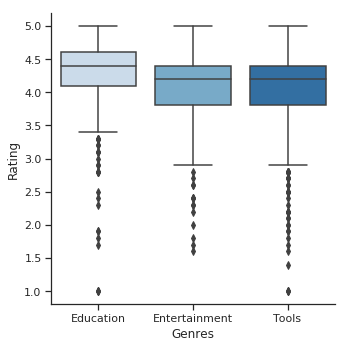

In [47]:
#catplot 
sns.catplot(x='Genres', y='Rating', kind='box',palette = 'Blues',  data=df[df.Genres.isin(['Tools', 'Entertainment', \
                                                                                          'Education'])])

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


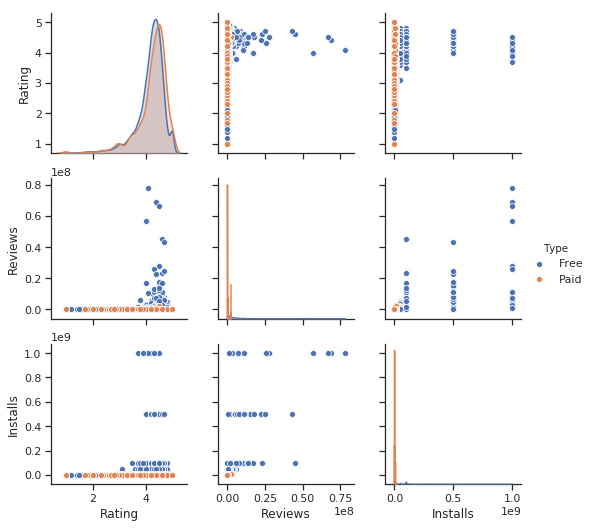

In [48]:
sns.pairplot(df, hue ='Type')

This means in terms of rating, free vs paid has the same distribution. More installs for free apps compared to paid apps. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null category
Installs          10840 non-null int64
Type              10840 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10838 non-null object
dtypes: category(1), float64(1), int64(2), object(9)
memory usage: 1.4+ MB


In [50]:
from scipy.stats import ttest_ind
ttest_ind(df[df.Type=='Free'].Installs, df[df.Type!='Free'].Installs)

Ttest_indResult(statistic=5.32026041494442, pvalue=1.0568404774692585e-07)

In [51]:
from scipy.stats import ttest_ind
ttest_ind(df[df.Type=='Free'].Rating.dropna(), df[df.Type!='Free'].Rating.dropna())

Ttest_indResult(statistic=-3.8331695795790606, pvalue=0.00012733077427688148)

In [52]:
from scipy.stats import ttest_ind
ttest_ind(df[df.Type=='Free'].Reviews.dropna(), df[df.Type!='Free'].Reviews.dropna())

Ttest_indResult(statistic=4.344909161367826, pvalue=1.4060215786806142e-05)